In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('municipios.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,taxa_freq_18_24,taxa_freq_25_29,taxa_freq_4_5,taxa_freq_4_6,taxa_freq_5_6,taxa_freq_6,taxa_freq_6_14,taxa_freq_6_17,taxa_freq_fundamental_15_17,taxa_freq_fundamental_18_24,taxa_freq_fundamental_4_5,taxa_freq_medio_18_24,taxa_freq_medio_6_14,taxa_freq_superior_15_17,taxa_fundamental_11_13,taxa_fundamental_12_14,taxa_fundamental_15_17,taxa_fundamental_16_18,taxa_fundamental_18_24,taxa_fundamental_18_mais,taxa_fundamental_25_mais,taxa_medio_18_20,taxa_medio_18_24,taxa_medio_18_mais,taxa_medio_19_21,taxa_medio_25_mais,taxa_superior_25_mais,renda_pc_max_quintil_1,renda_pc_max_quintil_2,renda_pc_max_quintil_3,renda_pc_max_quintil_4,renda_pc_max_decil_9,indice_gini,prop_pobreza_extrema,prop_pobreza_extrema_criancas,prop_pobreza,prop_pobreza_criancas,prop_vulner_pobreza,prop_vulner_pobreza_criancas,prop_renda_10_ricos,prop_renda_20_pobres,prop_renda_20_ricos,prop_renda_40_pobres,prop_renda_60_pobres,prop_renda_80_pobres,prop_renda_trabalho,razao_10_ricos_40_pobres,razao_20_ricos_40_pobres,renda_pc,renda_pc_quintil_1,renda_pc_decil_10,renda_pc_quintil_2,renda_pc_quintil_3,renda_pc_quintil_4,renda_pc_quintil_5,renda_pc_exc_renda_nula,renda_pc_pobreza_extrema,renda_pc_pobreza,renda_pc_vulner_pobreza,indice_theil,prop_trabalhadores_conta_proria,prop_empregadores,prop_ocupados_agropecuaria,prop_ocupados_comercio,prop_ocupados_construcao,prop_ocupados_extracao,prop_ocupados_formalizacao,prop_ocupados_fundamental,prop_ocupados_medio,prop_ocupados_servicos,prop_ocupados_siup,prop_ocupados_superior,prop_ocupados_transformacao,prop_ocupados_renda_0,prop_ocupados_renda_1_sm,prop_ocupados_renda_2_sm,prop_ocupados_renda_3_sm,prop_ocupados_renda_5_sm,renda_media_ocupados,taxa_atividade,taxa_atividade_10_14,taxa_atividade_15_17,taxa_atividade_18_24,taxa_atividade_18_mais,taxa_atividade_25_29,taxa_desocupacao,taxa_desocupacao_10_14,taxa_desocupacao_15_17,taxa_desocupacao_18_24,taxa_desocupacao_18_mais,taxa_desocupacao_25_29,indice_treil_trabalho,taxa_ocupados_carteira,taxa_ocupados_setor_publico,taxa_ocupados_sem_carteira,taxa_agua_encanada,taxa_banheiro_agua_encanada,taxa_densidade_2_mais,taxa_coleta_lixo,taxa_energia_eletrica,taxa_agua_esgoto_inadequados,taxa_paredes_inadequados,taxa_criancas_dom_sem_fund,taxa_criancas_fora_escola_4_5,taxa_criancas_fora_escola_6_14,taxa_dom_sem_fund,taxa_dom_vulner_sem_fund,taxa_sem_fund_informal,taxa_mulheres_com_filho_10_14,taxa_mulheres_com_filho_15_17,taxa_mulheres_chefe_filho_15m,taxa_nest_ntrab_vulner_15_24,taxa_vulner_desloc_1_hora,taxa_dom_vulner_dep_idoso,taxa_sem_energia_eletrica,populacao_homens_0_4,populacao_homens_10_14,populacao_homens_15_19,populacao_homens_20_24,populacao_homens_25_29,populacao_homens_30_34,populacao_homens_35_39,populacao_homens_40_44,populacao_homens_45_49,populacao_homens_50_54,populacao_homens_55_59,populacao_homens_5_9,populacao_homens_60_64,populacao_homens_65_69,populacao_homens_70_74,populacao_homens_75_79,populacao_homens,populacao_homens_80_mais,populacao_mulheres_0_4,populacao_mulheres_10_14,populacao_mulheres_15_19,populacao_mulheres_20_24,populacao_mulheres_25_29,populacao_mulheres_30_34,populacao_mulheres_35_39,popul

In [4]:
df = df[['ano','expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]

In [5]:
df.isna().sum()

ano                          0
expectativa_vida             0
expectativa_anos_estudo      0
indice_gini                  0
prop_pobreza_extrema         0
indice_frequencia_escolar    0
dtype: int64

In [6]:
df = df.loc[df['ano'] == 2010]

In [7]:
len(df)

5565

In [8]:
df.head()

,ano,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
2,2010,70.75,8.67,0.58,14.29,0.629
5,2010,73.36,9.18,0.53,4.36,0.648
8,2010,70.39,10.09,0.51,7.27,0.700
11,2010,74.27,9.74,0.57,5.97,0.698
14,2010,72.94,10.22,0.50,4.72,0.712


In [112]:
print(df['expectativa_anos_estudo'].mean())
print(df['indice_gini'].mean())
print(df['prop_pobreza_extrema'].mean())
print(df['indice_frequencia_escolar'].mean())

9.463638814016203
0.494380952380953
11.341415992812218
0.6683439353099748


In [145]:
import statistics as st
print(df['expectativa_vida'].mean())
print(st.stdev(df['expectativa_vida']))

73.08899550763705
2.680714744119558


In [146]:
df[['expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']].corr('spearman')

,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
expectativa_vida,1.000000,0.468071,-0.406924,-0.817240,0.673751
expectativa_anos_estudo,0.468071,1.000000,-0.366153,-0.549676,0.767891
indice_gini,-0.406924,-0.366153,1.000000,0.628764,-0.517690
prop_pobreza_extrema,-0.817240,-0.549676,0.628764,1.000000,-0.765108
indice_frequencia_escolar,0.673751,0.767891,-0.517690,-0.765108,1.000000


In [9]:
X = df[['expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]
Y = df[['expectativa_vida']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [33]:
parametro = {'alpha':np.arange(0.001, 1,0.001)}
scoring = {'R2': 'r2', 'Erro Quadrado médio': 'neg_mean_squared_error'}

In [34]:
lasso = GridSearchCV(Lasso(max_iter=100000,random_state=0), parametro, scoring = scoring, refit = 'Erro Quadrado médio', 
                     cv=10)
lasso.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.01...
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])},
             pre_dispatch='2*n_jobs', refit='Erro Quadrado médio',
             return_train_score=False,
             scoring={'Erro Quadrado médio': 'neg_mean_squared_error',
                      'R

In [35]:
print(lasso.best_estimator_.alpha)
print(lasso.best_score_)

0.001
-2.719794478763468


In [36]:
resultados = lasso.cv_results_
resultados = pd.DataFrame.from_dict(resultados)

In [37]:
pd.set_option('display.max_columns', None)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_Erro Quadrado médio,split1_test_Erro Quadrado médio,split2_test_Erro Quadrado médio,split3_test_Erro Quadrado médio,split4_test_Erro Quadrado médio,split5_test_Erro Quadrado médio,split6_test_Erro Quadrado médio,split7_test_Erro Quadrado médio,split8_test_Erro Quadrado médio,split9_test_Erro Quadrado médio,mean_test_Erro Quadrado médio,std_test_Erro Quadrado médio,rank_test_Erro Quadrado médio
0,0.002982,0.000440,0.002106,0.000291,0.001,{'alpha': 0.001},0.616730,0.649625,0.566086,0.624272,0.630446,0.669352,0.633165,0.642213,0.616758,0.573973,0.622262,0.030171,1,-2.827948,-2.308335,-3.106141,-2.980513,-2.919369,-2.292001,-2.615919,-2.512909,-2.750757,-2.884053,-2.719794,0.265066,1
1,0.002751,0.000380,0.001811,0.000399,0.002,{'alpha': 0.002},0.615792,0.650725,0.565711,0.623814,0.628389,0.668075,0.633322,0.642950,0.615287,0.575012,0.621908,0.030032,2,-2.834870,-2.301089,-3.108828,-2.984145,-2.935621,-2.300855,-2.614803,-2.507735,-2.761314,-2.877023,-2.722628,0.267251,2
2,0.002834,0.000337,0.001594,0.000487,0.003,{'alpha': 0.003},0.614583,0.651521,0.565107,0.623104,0.626077,0.666540,0.633192,0.643396,0.613593,0.575760,0.621287,0.029919,3,-2.843784,-2.295845,-3.113145,-2.989776,-2.953888,-2.311495,-2.615730,-2.504603,-2.773474,-2.871959,-2.727370,0.269598,3
3,0.002501,0.000481,0.001915,0.000296,0.004,{'alpha': 0.004},0.613105,0.652013,0.564277,0.622141,0.623510,0.664748,0.632774,0.643554,0.611673,0.576217,0.620401,0.029832,4,-2.854696,-2.292603,-3.119089,-2.997416,-2.974168,-2.323916,-2.618712,-2.503495,-2.787252,-2.868861,-2.734021,0.272099,4
4,0.002514,0.000448,0.001640,0.000517,0.005,{'alpha': 0.005},0.611355,0.652201,0.563219,0.620927,0.620687,0.662699,0.632069,0.643424,0.609528,0.576385,0.619249,0.029767,5,-2.867604,-2.291365,-3.126661,-3.007053,-2.996463,-2.338120,-2.623738,-2.504409,-2.802649,-2.867728,-2.742579,0.274746,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.002344,0.000455,0.001997,0.000630,0.995,{'alpha': 0.995},0.573074,0.628005,0.533214,0.583983,0.574405,0.615072,0.602825,0.620435,0.571795,0.556932,0.585974,0.028666,995,-3.150057,-2.450775,-3.341451,-3.300116,-3.362084,-2.668263,-2.832276,-2.665866,-3.073478,-2.999419,-2.984379,0.302442,995
995,0.002667,0.000439,0.001717,0.000446,0.996,{'alpha': 0.996},0.573072,0.628003,0.533216,0.583979,0.574401,0.615068,0.602821,0.620430,0.571797,0.556932,0.585972,0.028664,996,-3.150072,-2.450786,-3.341439,-3.300144,-3.362113,-2.668289,-2.832304,-2.665901,-3.073468,-2.999414,-2.984393,0.302438,996
996,0.002757,0.000594,0.001908,0.000526,0.997,{'alpha': 0.997},0.573071,0.628001,0.533218,0.583975,0.574397,0.615065,0.602817,0.620425,0.571798,0.556933,0.585970,0.028662,997,-3.150086,-2.450798,-3.341426,-3.300173,-3.362142,-2.668314,-2.832332,-2.665936,-3.073457,-2.999410,-2.984407,0.302434,997
997,0.002579,0.000477,0.001813,0.000386,0.998,{'alpha': 0.998},0.573069,0.627999,0.533219,0.583972,0.574394,0.615061,0.602814,0.620421,0.571800,0.556934,0.585968,0.028661,998,-3.150101,-2.450809,-3.341414,-3.300201,-3.362171,-2.668340,-2.832361,-2.665970,-3.073447,-2.999406,-2.984422,0.302430,998


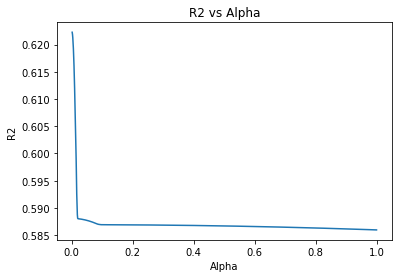

In [38]:
ax = plt.axes()
ax.plot(resultados['param_alpha'], resultados['mean_test_R2'])
ax.set(xlabel='Alpha', ylabel='R2',
       title='R2 vs Alpha');

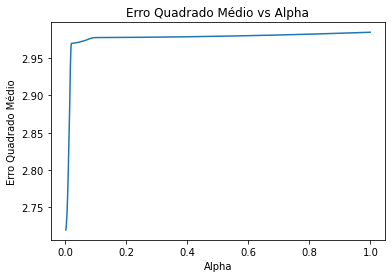

In [39]:
ax = plt.axes()
ax.plot(resultados['param_alpha'], abs(resultados['mean_test_Erro Quadrado médio']))
ax.set(xlabel='Alpha', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs Alpha');

In [169]:
for x in np.arange(0.001, 1,0.001):
    lasso = Lasso(alpha = x,max_iter=100000,random_state=0)
    lasso.fit(X_train,y_train)
    print('alpha:',x,"_",'Coeficientes:',lasso.coef_)

alpha: 0.001 _ Coeficientes: [-0.24380138  6.33570389 -0.16291252  7.90375016]
alpha: 0.002 _ Coeficientes: [-0.22028626  5.91430223 -0.16327335  7.39817861]
alpha: 0.003 _ Coeficientes: [-0.19676623  5.49294361 -0.16363492  6.89251413]
alpha: 0.004 _ Coeficientes: [-0.17327169  5.07136128 -0.16399266  6.38733319]
alpha: 0.005 _ Coeficientes: [-0.14977715  4.64977895 -0.1643504   5.88215224]
alpha: 0.006 _ Coeficientes: [-0.12628262  4.22819662 -0.16470814  5.3769713 ]
alpha: 0.007 _ Coeficientes: [-0.10278864  3.80660936 -0.16506579  4.87180094]
alpha: 0.008 _ Coeficientes: [-0.07929619  3.38500862 -0.16542322  4.36665952]
alpha: 0.009000000000000001 _ Coeficientes: [-0.05579036  2.9635249  -0.16578265  3.86126438]
alpha: 0.010000000000000002 _ Coeficientes: [-0.03229605  2.54194051 -0.16614036  3.35608775]
alpha: 0.011 _ Coeficientes: [-0.00880542  2.12032034 -0.16649748  2.85098162]
alpha: 0.012 _ Coeficientes: [-0.          1.70076554 -0.16676487  2.48645742]
alpha: 0.0130000000000

alpha: 0.136 _ Coeficientes: [ 0.          0.         -0.17477992  0.        ]
alpha: 0.137 _ Coeficientes: [ 0.          0.         -0.17477263  0.        ]
alpha: 0.138 _ Coeficientes: [ 0.          0.         -0.17476534  0.        ]
alpha: 0.139 _ Coeficientes: [ 0.          0.         -0.17475806  0.        ]
alpha: 0.14 _ Coeficientes: [ 0.          0.         -0.17475077  0.        ]
alpha: 0.14100000000000001 _ Coeficientes: [ 0.          0.         -0.17474349  0.        ]
alpha: 0.14200000000000002 _ Coeficientes: [ 0.         0.        -0.1747362  0.       ]
alpha: 0.14300000000000002 _ Coeficientes: [ 0.          0.         -0.17472892  0.        ]
alpha: 0.14400000000000002 _ Coeficientes: [ 0.          0.         -0.17472163  0.        ]
alpha: 0.14500000000000002 _ Coeficientes: [ 0.          0.         -0.17471434  0.        ]
alpha: 0.146 _ Coeficientes: [ 0.          0.         -0.17470706  0.        ]
alpha: 0.147 _ Coeficientes: [ 0.          0.         -0.17469977 

alpha: 0.278 _ Coeficientes: [ 0.          0.         -0.17374533  0.        ]
alpha: 0.279 _ Coeficientes: [ 0.          0.         -0.17373805  0.        ]
alpha: 0.28 _ Coeficientes: [ 0.          0.         -0.17373076  0.        ]
alpha: 0.281 _ Coeficientes: [ 0.          0.         -0.17372348  0.        ]
alpha: 0.28200000000000003 _ Coeficientes: [ 0.          0.         -0.17371619  0.        ]
alpha: 0.28300000000000003 _ Coeficientes: [ 0.         0.        -0.1737089  0.       ]
alpha: 0.28400000000000003 _ Coeficientes: [ 0.          0.         -0.17370162  0.        ]
alpha: 0.28500000000000003 _ Coeficientes: [ 0.          0.         -0.17369433  0.        ]
alpha: 0.28600000000000003 _ Coeficientes: [ 0.          0.         -0.17368705  0.        ]
alpha: 0.28700000000000003 _ Coeficientes: [ 0.          0.         -0.17367976  0.        ]
alpha: 0.28800000000000003 _ Coeficientes: [ 0.          0.         -0.17367247  0.        ]
alpha: 0.28900000000000003 _ Coeficien

alpha: 0.422 _ Coeficientes: [ 0.          0.         -0.17269618  0.        ]
alpha: 0.423 _ Coeficientes: [ 0.          0.         -0.17268889  0.        ]
alpha: 0.424 _ Coeficientes: [ 0.          0.         -0.17268161  0.        ]
alpha: 0.425 _ Coeficientes: [ 0.          0.         -0.17267432  0.        ]
alpha: 0.426 _ Coeficientes: [ 0.          0.         -0.17266703  0.        ]
alpha: 0.427 _ Coeficientes: [ 0.          0.         -0.17265975  0.        ]
alpha: 0.428 _ Coeficientes: [ 0.          0.         -0.17265246  0.        ]
alpha: 0.429 _ Coeficientes: [ 0.          0.         -0.17264518  0.        ]
alpha: 0.43 _ Coeficientes: [ 0.          0.         -0.17263789  0.        ]
alpha: 0.431 _ Coeficientes: [ 0.          0.         -0.17263061  0.        ]
alpha: 0.432 _ Coeficientes: [ 0.          0.         -0.17262332  0.        ]
alpha: 0.433 _ Coeficientes: [ 0.          0.         -0.17261603  0.        ]
alpha: 0.434 _ Coeficientes: [ 0.          0.        

alpha: 0.562 _ Coeficientes: [ 0.          0.         -0.17167617  0.        ]
alpha: 0.5630000000000001 _ Coeficientes: [ 0.          0.         -0.17166888  0.        ]
alpha: 0.5640000000000001 _ Coeficientes: [ 0.          0.         -0.17166159  0.        ]
alpha: 0.5650000000000001 _ Coeficientes: [ 0.          0.         -0.17165431  0.        ]
alpha: 0.5660000000000001 _ Coeficientes: [ 0.          0.         -0.17164702  0.        ]
alpha: 0.5670000000000001 _ Coeficientes: [ 0.          0.         -0.17163974  0.        ]
alpha: 0.5680000000000001 _ Coeficientes: [ 0.          0.         -0.17163245  0.        ]
alpha: 0.5690000000000001 _ Coeficientes: [ 0.          0.         -0.17162517  0.        ]
alpha: 0.5700000000000001 _ Coeficientes: [ 0.          0.         -0.17161788  0.        ]
alpha: 0.5710000000000001 _ Coeficientes: [ 0.          0.         -0.17161059  0.        ]
alpha: 0.5720000000000001 _ Coeficientes: [ 0.          0.         -0.17160331  0.        ]
a

alpha: 0.7030000000000001 _ Coeficientes: [ 0.          0.         -0.17064887  0.        ]
alpha: 0.7040000000000001 _ Coeficientes: [ 0.          0.         -0.17064158  0.        ]
alpha: 0.705 _ Coeficientes: [ 0.         0.        -0.1706343  0.       ]
alpha: 0.706 _ Coeficientes: [ 0.          0.         -0.17062701  0.        ]
alpha: 0.707 _ Coeficientes: [ 0.          0.         -0.17061973  0.        ]
alpha: 0.708 _ Coeficientes: [ 0.          0.         -0.17061244  0.        ]
alpha: 0.709 _ Coeficientes: [ 0.          0.         -0.17060515  0.        ]
alpha: 0.71 _ Coeficientes: [ 0.          0.         -0.17059787  0.        ]
alpha: 0.711 _ Coeficientes: [ 0.          0.         -0.17059058  0.        ]
alpha: 0.712 _ Coeficientes: [ 0.         0.        -0.1705833  0.       ]
alpha: 0.713 _ Coeficientes: [ 0.          0.         -0.17057601  0.        ]
alpha: 0.714 _ Coeficientes: [ 0.          0.         -0.17056873  0.        ]
alpha: 0.715 _ Coeficientes: [ 0.  

alpha: 0.838 _ Coeficientes: [ 0.          0.         -0.16966529  0.        ]
alpha: 0.839 _ Coeficientes: [ 0.        0.       -0.169658  0.      ]
alpha: 0.84 _ Coeficientes: [ 0.          0.         -0.16965071  0.        ]
alpha: 0.841 _ Coeficientes: [ 0.          0.         -0.16964343  0.        ]
alpha: 0.842 _ Coeficientes: [ 0.          0.         -0.16963614  0.        ]
alpha: 0.843 _ Coeficientes: [ 0.          0.         -0.16962886  0.        ]
alpha: 0.844 _ Coeficientes: [ 0.          0.         -0.16962157  0.        ]
alpha: 0.845 _ Coeficientes: [ 0.          0.         -0.16961429  0.        ]
alpha: 0.846 _ Coeficientes: [ 0.        0.       -0.169607  0.      ]
alpha: 0.847 _ Coeficientes: [ 0.          0.         -0.16959971  0.        ]
alpha: 0.848 _ Coeficientes: [ 0.          0.         -0.16959243  0.        ]
alpha: 0.849 _ Coeficientes: [ 0.          0.         -0.16958514  0.        ]
alpha: 0.85 _ Coeficientes: [ 0.          0.         -0.16957786  0. 

alpha: 0.979 _ Coeficientes: [ 0.          0.         -0.16863799  0.        ]
alpha: 0.98 _ Coeficientes: [ 0.         0.        -0.1686307  0.       ]
alpha: 0.981 _ Coeficientes: [ 0.          0.         -0.16862342  0.        ]
alpha: 0.982 _ Coeficientes: [ 0.          0.         -0.16861613  0.        ]
alpha: 0.983 _ Coeficientes: [ 0.          0.         -0.16860885  0.        ]
alpha: 0.984 _ Coeficientes: [ 0.          0.         -0.16860156  0.        ]
alpha: 0.985 _ Coeficientes: [ 0.          0.         -0.16859427  0.        ]
alpha: 0.986 _ Coeficientes: [ 0.          0.         -0.16858699  0.        ]
alpha: 0.987 _ Coeficientes: [ 0.         0.        -0.1685797  0.       ]
alpha: 0.988 _ Coeficientes: [ 0.          0.         -0.16857242  0.        ]
alpha: 0.989 _ Coeficientes: [ 0.          0.         -0.16856513  0.        ]
alpha: 0.99 _ Coeficientes: [ 0.          0.         -0.16855784  0.        ]
alpha: 0.991 _ Coeficientes: [ 0.          0.         -0.16855

In [170]:
lasso = Lasso(alpha = 0.001,max_iter=10000,random_state=0)
lasso.fit(X_train,y_train)
lasso.coef_

array([-0.24380138,  6.33570389, -0.16291252,  7.90375016])

In [171]:
previsoes = lasso.predict(X_test)
erro = mean_squared_error(y_test, previsoes)
print("Erro Quadrado Médio:", erro)
r2 = r2_score(y_test, previsoes)
print("R2:", r2)

Erro Quadrado Médio: 2.8073754103109176
R2: 0.6053620675892375


In [172]:
novos_dados = {'expectativa_anos_estudo': [7],
               'indice_gini': [0.4],
             'prop_pobreza_extrema':[15],
              'indice_freq_escolar':[0.75]}
novos_dados = pd.DataFrame(data=novos_dados)
novas_previsoes = lasso.predict(novos_dados)

In [173]:
novas_previsoes

array([73.14543111])